In [1]:
import numpy as np
import networkx as nx
from networkx import bipartite
import matplotlib.pyplot as plt
from nxviz import CircosPlot

This bipartite dataset shows the participation of 18 white women in 14 social events over a nine-month period. 
The data was collected in the Southern United States of America in the 1930s. 
There is an edge for every woman who participates in an event. 
The first column contains the women, the second column contains the events. 

In [2]:
#G = nx.algorithms.bipartite.edgelist.read_edgelist("southernwomen.edgelist")

In [3]:
SW = np.loadtxt("SW.txt")
S = np.zeros((18, 14))
for i in range(SW.shape[0]):
    S[int(SW[i][0]-1)][int(SW[i][1]-1)] = 1

Text(0, 0.5, 'events')

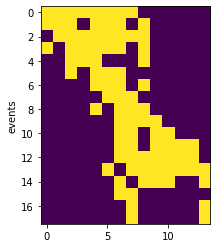

In [4]:
plt.imshow(S)
plt.ylabel("women")
plt.ylabel("events")

In [5]:
def nx_graph_from_biadjacency_matrix(M):
    # Give names to the nodes in the two node sets
    U = [ "u{}".format(i) for i in range(M.shape[0]) ]#women
    V = [ "v{}".format(i) for i in range(M.shape[1]) ]#event

    # Create the graph and add each set of nodes
    G = nx.Graph()
    G.add_nodes_from(U, bipartite=0)
    G.add_nodes_from(V, bipartite=1)

    # Find the non-zero indices in the biadjacency matrix to connect 
    # those nodes
    G.add_edges_from([ (U[i], V[j]) for i, j in zip(*M.nonzero()) ])

    return G

In [6]:
G = nx_graph_from_biadjacency_matrix(S)

In [7]:
#c = bipartite.color(G)

In [8]:
#nx.set_node_attributes(G, c, "bipartite")

In [9]:
#l1 = G.number_of_nodes

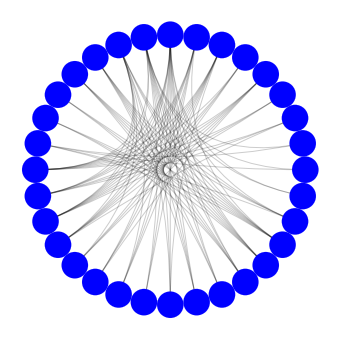

In [10]:
c = CircosPlot(G)
c.draw()

(-0.7308907605443085,
 0.8087265677062248,
 -1.0467785811227257,
 1.0974656467201298)

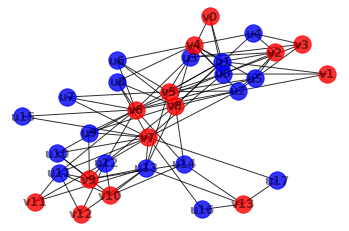

In [11]:
pos=nx.spring_layout(G)
com1 = [ "u{}".format(i) for i in range(S.shape[0])]
com2 = [ "v{}".format(i) for i in range(S.shape[1])]
nx.draw_networkx_nodes(G, pos = pos, nodelist=com1, node_color='b', alpha = 0.8)
nx.draw_networkx_nodes(G, pos = pos, nodelist=com2, node_color='r', alpha = 0.8)
nx.draw_networkx_edges(G, pos = pos, edgelist = G.edges(), width = 1, alpha = 0.8, edge_color = 'k')
labels=nx.draw_networkx_labels(G, pos=pos, labels=None, font_size=12, font_color='k', font_family='sans-serif', font_weight='heavy', alpha=0.5, bbox=None, ax=None)
plt.axis("off")

In [12]:
U_B, SIGMA_B, XT_B = np.linalg.svd(S, full_matrices=True, compute_uv=True)

Text(0, 0.5, 'singular values')

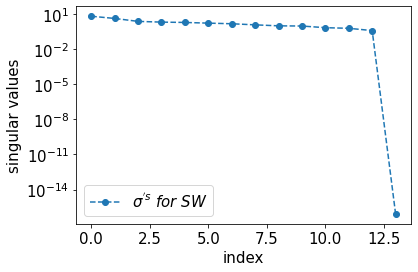

In [15]:
plt.plot(SIGMA_B, "--o", label = r"$\sigma ^{'s}\ for\ SW$")
plt.legend(loc = "best", prop = {'size':15})
plt.tick_params(labelsize = 15)
#plt.ylim(10**-2, 10**4)
plt.yscale("log")
plt.xlabel("index", fontsize = 15)
plt.ylabel("singular values", fontsize = 15)